# DM Assignment

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
# Read the dataframe
df = pd.read_csv("kidneyChronic.csv")

In [4]:
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd


## Data Preprocessing/ Descriptive Summarization

In the given dataset, after reading we see that there are missing values which are represented using `?`. 

Let us read in the dataset with these values as nan values properly.

Also, since we're given the datatype of each and every variable explicitly, let us make use of that information by defining a map of these different datatypes systematically.

In [5]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [6]:
dtypes = {"age":"float", "bp":"float64", "sg": "str", "al": "str", "su":"str", "rbc":"str",
          "pc":"str", "pcc":"str", "ba":"str", "bgr":"float64", "bu":"float64", "sc":"float64",
          "sod":"float64","pot":"float64","hemo":"float64", "pcv":"float64", "wbcc":"float64",
          "rbcc":"float64","htn":"str", "dm":"str", "cad":"str", "appet":"str", "pe":"str",
          "ane":"str","class":"str"
         }

In [7]:
df = pd.read_csv("kidneyChronic.csv", na_values="?", dtype=dtypes)
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [8]:
# Have a look at the type of data that we are dealing with
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

We can see that there are some numeric and a few string/nominal attributes in the given dataset. So, we have 11 numeric and 14 nominal variables. Our target is also nominal. So this means

X: 11 + 13 - 24 variables

y: 1 - Single variable

We have to model this y which is the variable named `class` as a function of these 24 `X` input variables respectively.

Let's have a look at the numeric datatypes and their distribution in the dataset

In [9]:
df.select_dtypes("float64").describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,390.000000,387.000000,355.000000,380.000000,382.000000,312.000000,311.000000,347.000000,328.000000,293.000000,268.000000
mean,51.443590,76.485788,148.166197,57.450526,3.072120,137.530449,4.626045,12.528242,38.899390,8410.580205,4.711194
std,17.173712,13.697384,79.355796,50.567265,5.748652,10.425430,3.198981,2.916598,8.999776,2948.517855,1.025383
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.975000
50%,54.500000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.700000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


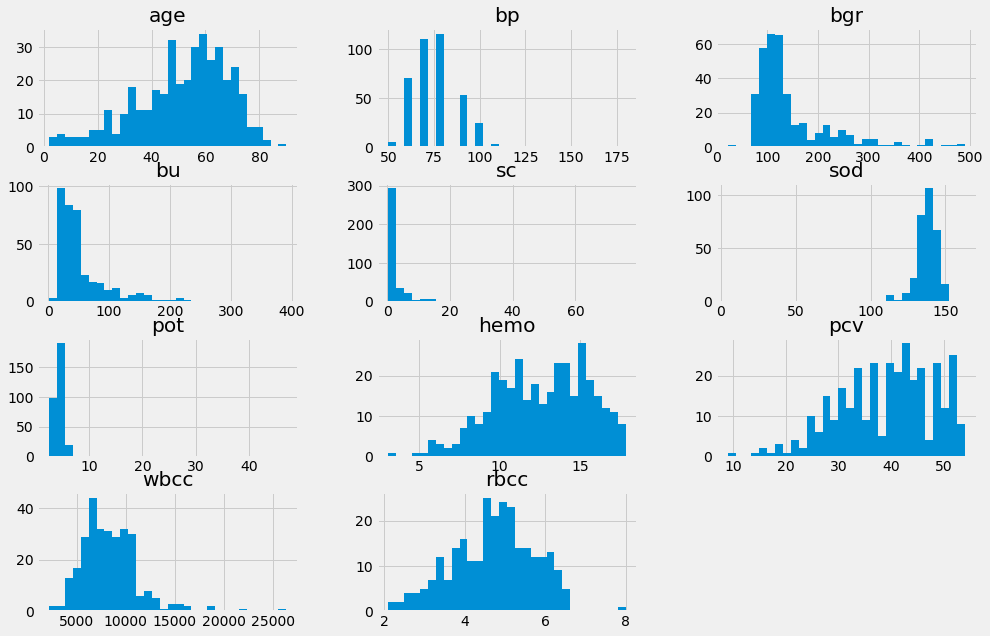

In [10]:
# Visualize the distribution of the numerical variables
df.hist(bins=30, figsize=(15, 10));

**Observations**

- Of the 400 observations, we have some data missing in each of the columns respectively as seen from their counts. The highest absent is in `rbcc` which is 33% and the lowest proportion of missing data is in age which is 2.5%.

- `Age`, `wbcc` and `rbcc` seems to be almost normally distributed with some small number of outliers.

- `bp`, `bgr`, `bu`, `sc`, `pot` seem to be right skewed in nature i.e. they have a long right tail. 

- `sod`, `hemo` and `pcv` seem to be left skewed in nature i.e. they have a longer left tail.

- The distributions are not very neat and clean as normal distributions and have multiple peaks and valleys, however there's some semblance to the distributions we have commonly encountered in textbooks.

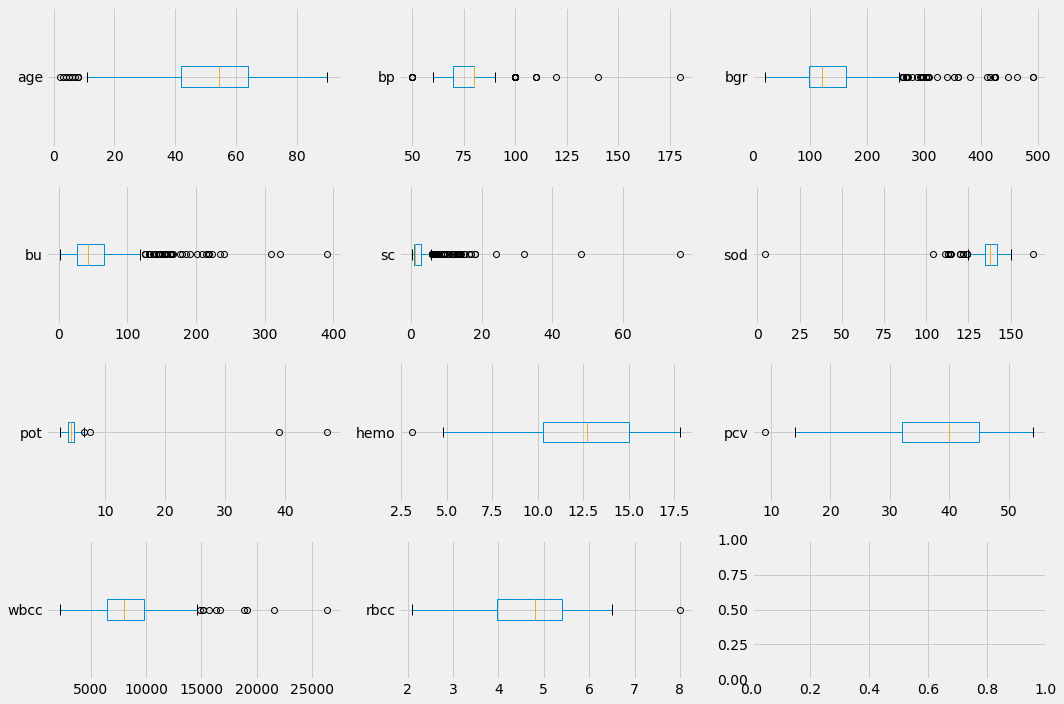

In [17]:
# Look at the boxplots to understand the outliers in the dataset
numerical_cols = df.select_dtypes("float64").columns
fig, ax = plt.subplots(4, 3, figsize = (15, 10));

for axis, col in zip(ax.flatten(), numerical_cols):
    df.boxplot(column = col, ax = axis, vert = False);
plt.tight_layout();

Looking at the boxplots of each variable separately, we can evidently see that there are several attributes where there are some outliers present in the dataset. In attributes like `pot`, `sod`, `bu` etc. there are clear instances of points which are potential outliers. 

We need to process them and take care of these potential outlier datapoints. We shall do that shortly after we inspect the categorical columns in the dataframe as well. We will use counts to analyse these datapoints.

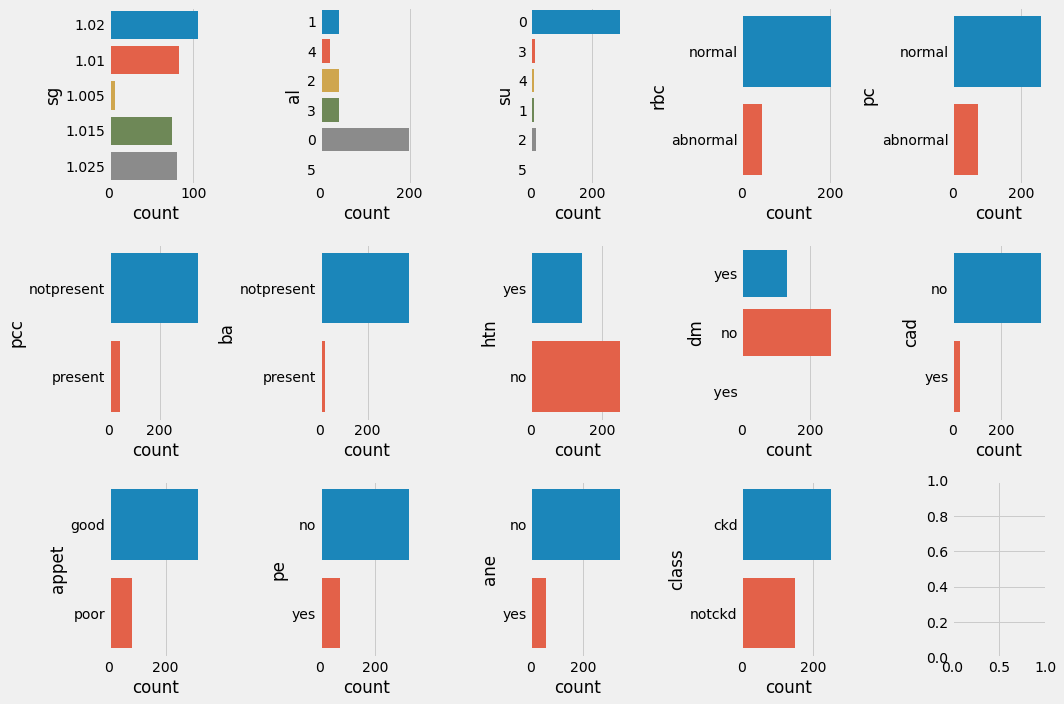

In [23]:
# Look at the boxplots to understand the outliers in the dataset
nominal_columns = df.select_dtypes("object").columns
fig, ax = plt.subplots(3, 5, figsize = (15, 10));

for axis, col in zip(ax.flatten(), nominal_columns):
    sns.countplot(y = col, data = df, ax = axis);

plt.tight_layout();

Here, we can observe that in most of the cases, our columns are highly imbalanced in nature; one observation is much more frequent than the other one.

Our target variable which is `class` also has some imbalance but not as worse as other points in our dataset.

Medical data can be expected to be this way because thankfully enough, the number of anomalies/worst case conditions are much less than those of average case or best case conditions. 

To tackle this imbalance in the datset in the input variables, we can do a weighted sampling so that we give higher weightage to the classes with lower counts and oversample them more often.

## Attribute Selection

## Data Transformation

## Feature Engineering

## Model Building/ Analysing Data

## Model Evaluation

## Future Scope/ Refinement opportunities